In [ ]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!wget https://raw.githubusercontent.com/MarkMData/DABI_project/main/portfolio.json
!wget https://raw.githubusercontent.com/MarkMData/DABI_project/main/profile.json
!wget https://raw.githubusercontent.com/MarkMData/DABI_project/main/transcript.json


read in the portfolio json file

In [3]:
portfolio = []
with open('portfolio.json') as f:
    for line in f:
        portfolio.append(json.loads(line))

In [ ]:
portfolio

In [5]:
print(type(portfolio))
print(len(portfolio))

<class 'list'>
10


In [6]:
portfolio[4].items()

dict_items([('reward', 5), ('channels', ['web', 'email']), ('difficulty', 20), ('duration', 10.0), ('offer_type', 'discount'), ('id', '0b1e1539f2cc45b7b9fa7c272da2e1d7')])

Make columns from portfolio data to be put in a dataset

In [7]:
reward = [p["reward"] for p in portfolio]
difficulty = [p["difficulty"] for p in portfolio]
duration = [p["duration"] for p in portfolio]
offer_type = [p["offer_type"] for p in portfolio]
id_col = [p["id"] for p in portfolio]
channels_list=[p["channels"] for p in portfolio]

Check all type of channels

In [8]:
channels =[]
for p in portfolio:
    for lst in (p["channels"]):
        channels.append(lst)
channels=set(channels)


In [9]:
channels # all type of channels

{'email', 'mobile', 'social', 'web'}

Make dummy variables for email, mobile, social and web

In [10]:
email=[ 1 if "email" in lst else 0 for lst in channels_list]
mobile=[ 1 if "mobile" in lst else 0 for lst in channels_list]
social=[ 1 if "social" in lst else 0 for lst in channels_list]
web=[ 1 if "web" in lst else 0 for lst in channels_list]

Make dummy variables of offer type

In [12]:
set(offer_type)

{'bogo', 'discount', 'informational'}

In [13]:
bogo=[ 1 if "bogo" in lst else 0 for lst in offer_type]
discount=[ 1 if "discount" in lst else 0 for lst in offer_type]
informational=[ 1 if "informational" in lst else 0 for lst in offer_type]

In [14]:
portfolio_df = pd.DataFrame({"id":id_col,"reward":reward, "difficulty":difficulty, "duration":duration, "bogo":bogo,
                            "discount":discount, "informational":informational,"email":email, "mobile":mobile, "social":social, "web":web})

#### difficulty and duration

In [15]:
set(difficulty)

{0, 5, 7, 10, 20}

In [16]:
set(duration)

{3.0, 4.0, 5.0, 7.0, 10.0}

In [17]:
portfolio_df

,id,reward,difficulty,duration,bogo,discount,informational,email,mobile,social,web
0,ae264e3637204a6fb9bb56bc8210ddfd,10,10,7.0,1,0,0,1,1,1,0
1,4d5c57ea9a6940dd891ad53e9dbe8da0,10,10,5.0,1,0,0,1,1,1,1
2,3f207df678b143eea3cee63160fa8bed,0,0,4.0,0,0,1,1,1,0,1
3,9b98b8c7a33c4b65b9aebfe6a799e6d9,5,5,7.0,1,0,0,1,1,0,1
4,0b1e1539f2cc45b7b9fa7c272da2e1d7,5,20,10.0,0,1,0,1,0,0,1
5,2298d6c36e964ae4a3e7e9706d1fb8c2,3,7,7.0,0,1,0,1,1,1,1
6,fafdcd668e3743c1bb461111dcafc2a4,2,10,10.0,0,1,0,1,1,1,1
7,5a8bc65990b245e5a138643cd4eb9837,0,0,3.0,0,0,1,1,1,1,0
8,f19421c1d4aa40978ebb69ca19b0e20d,5,5,5.0,1,0,0,1,1,1,1
9,2906b810c7d4411798c6938adc9daaa5,2,10,7.0,0,1,0,1,1,0,1


### Comments on portfolio dataset

- reward is the monetary value of the promotion.
- channels is the ways in which the promotion was advertised.
- difficulty is the amount the customer needs to spend in order to receive the reward.
- duration is the total number of days that the promotion was available.
- offer_type is the type of promotion. This is either a money off offer (discount), buy one get one free (BOGO) or a news letter (informational).
- id is the promotion identification.

offer type - bogo/discount/information are mutually exclusive. For certain analysis we may drop one variable
channel - email is in all channels and may be deleted
Is it worthwhile making duration and difficulty  ordinal categorical?

###################
###################
###################
# investigate profile.json

#### load profile.json

In [18]:
profile = []
with open('profile.json') as f:
    for line in f:
        profile.append(json.loads(line))

In [ ]:
profile

In [ ]:
profile[0]

In [ ]:
profile[1]

In [ ]:
len(profile)

#### create gender list

In [50]:
gender = [p["gender"] for p in profile]

In [ ]:
set(gender) # how to deal with missing values/ gender neutral

{'F', 'M', None, 'O'}

#### create age column and investigate

In [51]:
age = [p["age"] for p in profile]

In [52]:
max(age) # delete people aged 118

118

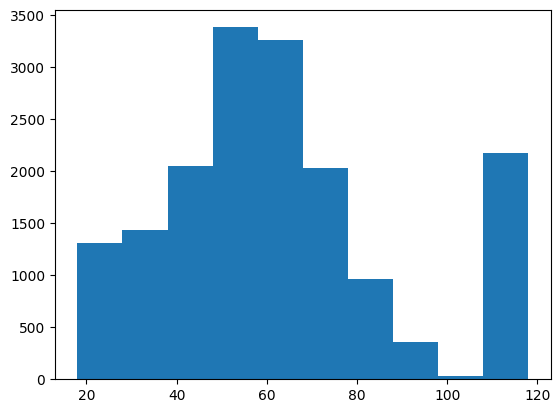

In [53]:
plt.hist(age)
plt.show()

#### other columns

In [54]:
cust_id = [p["id"] for p in profile]
membership_start = [p["became_member_on"] for p in profile]
income = [p["income"] for p in profile]

#### create dataframe

In [55]:
profile_df = pd.DataFrame({"id":cust_id, "gender":gender, "age":age, "membership_start":membership_start, "income":income})
profile_df["membership_start"]=pd.to_datetime(profile_df["membership_start"])
profile_df.head()

,id,gender,age,membership_start,income
0,68be06ca386d4c31939f3a4f0e3dd783,None,118,2017-02-12,NaN
1,0610b486422d4921ae7d2bf64640c50b,F,55,2017-07-15,112000.0
2,38fe809add3b4fcf9315a9694bb96ff5,None,118,2018-07-12,NaN
3,78afa995795e4d85b5d9ceeca43f5fef,F,75,2017-05-09,100000.0
4,a03223e636434f42ac4c3df47e8bac43,None,118,2017-08-04,NaN


#### investigate columns in dataframe

In [ ]:
profile_df.info()

In [ ]:
profile_df.describe()

,age,membership_start,income
count,17000.000000,17000,14825.000000
mean,62.531412,2017-02-23 13:12:10.164706048,65404.991568
min,18.000000,2013-07-29 00:00:00,30000.000000
25%,45.000000,2016-05-26 00:00:00,49000.000000
50%,58.000000,2017-08-02 00:00:00,64000.000000
75%,73.000000,2017-12-30 00:00:00,80000.000000
max,118.000000,2018-07-26 00:00:00,120000.000000
std,26.738580,NaN,21598.299410


In [59]:
np.sum(pd.isna(profile_df["gender"]))

2175

In [60]:
profile_df[profile_df["age"]==118]["gender"] # 118 age na values

0        None
2        None
4        None
6        None
7        None
         ... 
16980    None
16982    None
16989    None
16991    None
16994    None
Name: gender, Length: 2175, dtype: object

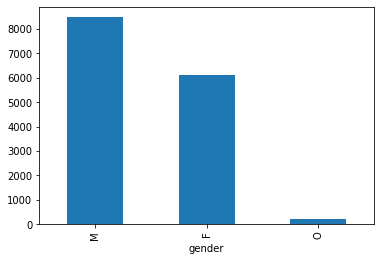

In [ ]:
profile_df['gender'].value_counts().plot(kind='bar')
plt.show()

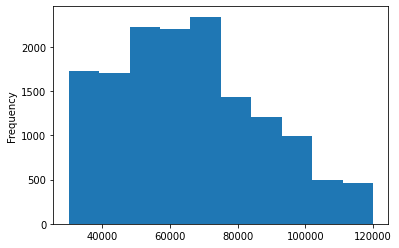

In [ ]:
profile_df['income'].plot(kind='hist')
plt.show()

### Comments on Profile

- gender is the identified gender of the customer.
- age is the age of the customer at the time of the promotion period.
- id is the customer membership identification.
- became_member is the date when the customer became a member.
- income is the self reported income of the customer at the time of the promotion period.

##################
# investigate transcript data
# transcript can be used to merge with other two datasets.

In [21]:
transcript = []
with open('transcript.json') as f:
    for line in f:
        transcript.append(json.loads(line))

In [ ]:
transcript[0]

In [ ]:
transcript[1500]

In [ ]:
len(transcript)

### create columns

In [25]:
person_id = [p["person"] for p in transcript]
event = [p["event"] for p in transcript]
time = [p["time"] for p in transcript]

In [ ]:
set(event)

{'offer completed', 'offer received', 'offer viewed', 'transaction'}

In [26]:
# create dummy variables of transactions
offer_completed=[1 if "offer completed" in lst else 0 for lst in event]
offer_received=[1 if "offer received" in lst else 0 for lst in event]
offer_viewed=[1 if "offer viewed" in lst else 0 for lst in event]
transaction=[1 if "transaction" in lst else 0 for lst in event]

In [28]:
# check number of each event
print(sum(offer_completed))
print(sum(offer_received))
print(sum(offer_viewed))
print(sum(transaction))

33579
76277
57725
138953


In [ ]:
# check all dummy variables = observations in transactions
sum(offer_completed)+sum(offer_received)+sum(offer_viewed)+sum(transaction)==len(transcript)

True

#### how to organise the value column

In [32]:
value =  [p["value"] for p in transcript] # discuss amount, offer.id, offer_id and reward

In [33]:
key_list=[]
for dic in value:
    key_list.append(dic.keys())

In [ ]:
key_list[-20:]

In [ ]:
key_list[:10]

In [ ]:
# analysing all unique keys
all_keys=[]
for dic in value:
    if dic.keys() not in all_keys:
        all_keys.append(dic.keys())
all_keys

In [35]:
# create the rewards received column
reward = []
for ind,dic in enumerate(value):
    if "reward" in dic.keys():
        reward.append(dic["reward"])
    else:
        reward.append(pd.NA)

In [36]:
#create offer_id column with all offer id and offer_id
offer_id = []
for dic in value:
    if "offer id" in dic.keys():
        offer_id.append(dic["offer id"])
    elif  "offer_id" in dic.keys():
        offer_id.append(dic["offer_id"])
    else:
        offer_id.append(pd.NA)

In [37]:
# create amount column
amount = []
for ind,dic in enumerate(value):
    if "amount" in dic.keys():
        amount.append(dic["amount"])
    else:
        amount.append(pd.NA)

In [38]:
# check offer_id is same length as other columns
offer_id2=0
offer_id3=0
offer_id4=0
for dic in value:
    if "offer id" not in dic.keys() and "offer_id" not in dic.keys():
        offer_id2+=1
for dic in value:
    if "offer id" in dic.keys():
        offer_id3+=1
for dic in value:
    if "offer_id" in dic.keys():
        offer_id4+=1

offer_id2+offer_id3+offer_id4

306534

In [39]:
# create transcript dataframe
transcript_df = pd.DataFrame({"person_id":person_id, "offer_id":offer_id,"time":time, "offer_completed":offer_completed,
                              "offer_received":offer_received, "offer_viewed":offer_viewed, "transaction":transaction,
                              "reward":reward, "amount":amount})

In [ ]:
transcript_df.tail(20)

In [72]:
# Count of na values in offer_id
np.sum(pd.isna(transcript_df["offer_id"]))

138953

In [73]:
# All transactions are missing offer_id
np.sum(transcript_df["transaction"])

138953

In [ ]:
# quick observation of the data
transcript_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   person_id        306534 non-null  object
 1   offer_id         167581 non-null  object
 2   time             306534 non-null  int64 
 3   offer_completed  306534 non-null  int64 
 4   offer_received   306534 non-null  int64 
 5   offer_viewed     306534 non-null  int64 
 6   transaction      306534 non-null  int64 
 7   reward           33579 non-null   object
 8   amount           138953 non-null  object
dtypes: int64(5), object(4)
memory usage: 21.0+ MB


In [ ]:
transcript_df.describe()

,time,offer_completed,offer_received,offer_viewed,transaction
count,306534.000000,306534.000000,306534.000000,306534.000000,306534.000000
mean,366.382940,0.109544,0.248837,0.188315,0.453304
std,200.326314,0.312321,0.432340,0.390964,0.497815
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,186.000000,0.000000,0.000000,0.000000,0.000000
50%,408.000000,0.000000,0.000000,0.000000,0.000000
75%,528.000000,0.000000,0.000000,0.000000,1.000000
max,714.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# check pairs plot (slow)
sns.pairplot(transcript_df)

In [ ]:
# offer id and amount mutually exclusive
transcript_df[["offer_id", "amount"]]

In [ ]:
# min and max amount people spend removing na (na maybe should be changed to zero?)
transcript_df[["person_id", "amount"]].groupby("person_id").agg("mean").sort_values(by="amount").dropna()

In [ ]:
# number of observations and different observations with number of unique variables
transcript_df.groupby('person_id').agg(['count', 'nunique'])

In [ ]:
# investigating individual transactions
transcript_df[transcript_df["person_id"]=="0009655768c64bdeb2e877511632db8f"]

In [ ]:
# events at same time
transcript_df[transcript_df["person_id"]=="0009655768c64bdeb2e877511632db8f"][transcript_df["time"]==576]

In [46]:
# investigating individual transactions
transcript_df[transcript_df["person_id"]=="00116118485d4dfda04fdbaba9a87b5c"]

,person_id,offer_id,time,offer_completed,offer_received,offer_viewed,transaction,reward,amount
56475,00116118485d4dfda04fdbaba9a87b5c,f19421c1d4aa40978ebb69ca19b0e20d,168,0,1,0,0,<NA>,<NA>
85769,00116118485d4dfda04fdbaba9a87b5c,f19421c1d4aa40978ebb69ca19b0e20d,216,0,0,1,0,<NA>,<NA>
104088,00116118485d4dfda04fdbaba9a87b5c,<NA>,294,0,0,0,1,<NA>,0.7
187632,00116118485d4dfda04fdbaba9a87b5c,<NA>,456,0,0,0,1,<NA>,0.2
193680,00116118485d4dfda04fdbaba9a87b5c,<NA>,474,0,0,0,1,<NA>,3.19
248359,00116118485d4dfda04fdbaba9a87b5c,f19421c1d4aa40978ebb69ca19b0e20d,576,0,1,0,0,<NA>,<NA>
284472,00116118485d4dfda04fdbaba9a87b5c,f19421c1d4aa40978ebb69ca19b0e20d,630,0,0,1,0,<NA>,<NA>


In [ ]:
transcript_df[transcript_df["person_id"]=="0011e0d4e6b944f998e987f904e8c1e5"]

In [48]:
# investigating individual offer id for one person
transcript_df[transcript_df["person_id"]=="0009655768c64bdeb2e877511632db8f"][transcript_df["offer_id"]=="5a8bc65990b245e5a138643cd4eb9837"]

<ipython-input-48-e008c6fd80e5>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  transcript_df[transcript_df["person_id"]=="0009655768c64bdeb2e877511632db8f"][transcript_df["offer_id"]=="5a8bc65990b245e5a138643cd4eb9837"]


,person_id,offer_id,time,offer_completed,offer_received,offer_viewed,transaction,reward,amount
55972,0009655768c64bdeb2e877511632db8f,5a8bc65990b245e5a138643cd4eb9837,168,0,1,0,0,<NA>,<NA>
77705,0009655768c64bdeb2e877511632db8f,5a8bc65990b245e5a138643cd4eb9837,192,0,0,1,0,<NA>,<NA>


### Comments on transactions

- person is the customer membership identification.
- event is the event - either offer received, offer viewed, offer complete or transaction.
- value.offer.id is the promotion identification.
- value.amount is the amount spent in GBP for a given transaction.
- value.offer_id is the promotion identification.
- value.reward is the monetary value of the promotion.
- time time from the beginning of the promotion period.

Looking at each individual's transactions helps to show the process of claiming a reward. It looks like offer is received, then offer_viewed (not always viewed before completed) and completed. Transactions and rewards are recorded at different time frames. There is one example when the offer is received at the same time as transaction and claimed.

Need to look into group by offer_id

# Create csv

In [ ]:
portfolio_df.to_csv("portfolio.csv")
profile_df.to_csv("profile.csv")
transcript_df.to_csv("transcript.csv")

# Merged data

In [63]:
merged_data=pd.merge(transcript_df, profile_df, how = "inner", left_on="person_id", right_on="id")
merged_data=pd.merge(merged_data, portfolio_df, how = "inner", left_on="offer_id", right_on="id")
merged_data.head()

,person_id,offer_id,time,offer_completed,offer_received,offer_viewed,transaction,reward_x,amount,id_x,...,reward_y,difficulty,duration,bogo,discount,informational,email,mobile,social,web
0,78afa995795e4d85b5d9ceeca43f5fef,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,0,1,0,0,<NA>,<NA>,78afa995795e4d85b5d9ceeca43f5fef,...,5,5,7.0,1,0,0,1,1,0,1
1,78afa995795e4d85b5d9ceeca43f5fef,9b98b8c7a33c4b65b9aebfe6a799e6d9,6,0,0,1,0,<NA>,<NA>,78afa995795e4d85b5d9ceeca43f5fef,...,5,5,7.0,1,0,0,1,1,0,1
2,78afa995795e4d85b5d9ceeca43f5fef,9b98b8c7a33c4b65b9aebfe6a799e6d9,132,1,0,0,0,5,<NA>,78afa995795e4d85b5d9ceeca43f5fef,...,5,5,7.0,1,0,0,1,1,0,1
3,e2127556f4f64592b11af22de27a7932,9b98b8c7a33c4b65b9aebfe6a799e6d9,408,0,1,0,0,<NA>,<NA>,e2127556f4f64592b11af22de27a7932,...,5,5,7.0,1,0,0,1,1,0,1
4,e2127556f4f64592b11af22de27a7932,9b98b8c7a33c4b65b9aebfe6a799e6d9,420,0,0,1,0,<NA>,<NA>,e2127556f4f64592b11af22de27a7932,...,5,5,7.0,1,0,0,1,1,0,1


In [1]:
print("Jorge Input, hello world")

Jorge Input, hello world
